# Heating systems

There are 4 heating systems at AUG. Here's some basic info on the systems:

|Heating method| Power [MW] | Shotfile | Signal |
|---|---|---|---|
| ECRH | ~6 | `ECS` | `PECRH` |
| ICRF | ~6 | `ICP` | `PICRN` |
| ICRF (coupled) | ~6 | `ICP` | `PICRFc` |
| NBI | 20 | `NIS` | `PNI` |
| Ohmic | ~1.5 | `TOT` | `P_OH` |
| Total | n.a. | `TOT` | `P_TOT` |

Please note there is a difference between __applied__ power and __coupled__ power (or effective power). Sometimes it is useful to check the total power applied to the plasma with somes corrections, such as the NBI shine through and dW/dt. For that, read `TOT:P_TOT`.

In [1]:
import sys
sys.path.append('ipfnlite/')
sys.path.append('/afs/ipp/aug/ads-diags/common/python/lib/')
import matplotlib.pyplot as plt
from getsig import getsig

In [2]:
shotnr = 36753
ecs = getsig(shotnr, 'ECS', 'PECRH')
icp = getsig(shotnr, 'ICP', 'PICRN')
nbi = getsig(shotnr, 'NIS', 'PNI')
ohm = getsig(shotnr, 'TOT', 'P_OH')
tot = getsig(shotnr, 'TOT', 'P_TOT')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


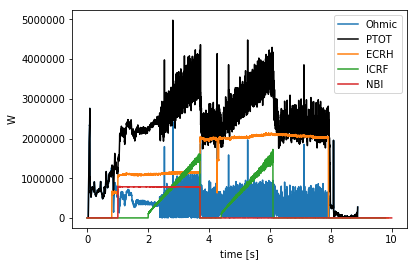

In [4]:
plt.plot(ohm.time, ohm.data, label='Ohmic')
plt.plot(tot.time, tot.data, label='PTOT', color='k')
plt.plot(ecs.time, ecs.data, label='ECRH')
plt.plot(icp.time, icp.data, label='ICRF')
plt.plot(nbi.time, nbi.data, label='NBI')
plt.legend(loc='best')
plt.ylabel(nbi.unit)
plt.xlabel('time [s]')
plt.show()